In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, GroupKFold
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from metric_learn import LMNN
from ml_utils import graph
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from feature_selector import FeatureSelector, adjust_r2, calc_score
from file_loader import FileLoader

import collections
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True)

%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)

/home/maciej/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [10]:
# ['o1', 'o2', 'o3', 'o4', 'o5']
fl = FileLoader(['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o0'], mode='u', dim=[1, 2])

Loaded dataframe: (2157, 53)
Loaded dataframe: (2158, 1)


In [156]:
fl = FileLoader(['o5'], mode='c')

Loaded dataframe: (49, 53)


In [157]:
fl.df

PAPI_BR_CN  \
alg       run                                                              
d3_r0_a1  -D PARAM_N_0=215 -D PARAM_N_1=215 -D PARAM_N_2=215    0.005445   
          -D PARAM_N_0=246 -D PARAM_N_1=246 -D PARAM_N_2=246    0.005636   
          -D PARAM_N_0=271 -D PARAM_N_1=271 -D PARAM_N_2=271    0.005674   
          -D PARAM_N_0=292 -D PARAM_N_1=292 -D PARAM_N_2=292    0.005674   
          -D PARAM_N_0=310 -D PARAM_N_1=310 -D PARAM_N_2=310    0.005662   
          -D PARAM_N_0=326 -D PARAM_N_1=326 -D PARAM_N_2=326    0.005669   
          -D PARAM_N_0=341 -D PARAM_N_1=341 -D PARAM_N_2=341    0.005642   
          -D PARAM_N_0=355 -D PARAM_N_1=355 -D PARAM_N_2=355    0.005673   
          -D PARAM_N_0=368 -D PARAM_N_1=368 -D PARAM_N_2=368    0.005644   
d3_r0_a2  -D PARAM_N_0=170 -D PARAM_N_1=170 -D PARAM_N_2=170    0.005670   
          -D PARAM_N_0=195 -D PARAM_N_1=195 -D PARAM_N_2=195    0.005707   
          -D PARAM_N_0=215 -D PARAM_N_1=215 -D PARAM_N_2=215    0.005708   
          -D PARAM_N_0=231 -D PARAM_N_1=231 -D PARAM_N_2=231    0.005641   
          -D PARAM_N_0=246 -D PARAM_N_1=246 -D PARAM_N_2=246    0.005656   
          -D PARAM_N_0=259 -D PARAM_N_1=259 -D PARAM_N_2=259    0.005705   
          -D PARAM_N_0=271 -D PARAM_N_1=271 -D PARAM_N_2=271    0.005653   
          -D PARAM_N_0=281 -D PARAM_N_1=281 -D PARAM_N_2=281    0.005491   
          -D PARAM_N_0=292 -D PARAM_N_1=292 -D PARAM_N_2=292    0.005670   
d4_r0_a2  -D PARAM_N_0=46 -D PARAM_N_1=46 -D PARAM_N_2=46...    0.002320   
          -D PARAM_N_0=51 -D PARAM_N_1=51 -D PARAM_N_2=51...    0.002327   
          -D PARAM_N_0=55 -D PARAM_N_1=55 -D PARAM_N_2=55...    0.002372   
          -D PARAM_N_0=58 -D PARAM_N_1=58 -D PARAM_N_2=58...    0.002347   
          -D PARAM_N_0=61 -D PARAM_N_1=61 -D PARAM_N_2=61...    0.002350   
          -D PARAM_N_0=64 -D PARAM_N_1=64 -D PARAM_N_2=64...    0.002361   
          -D PARAM_N_0=66 -D PARAM_N_1=66 -D PARAM_N_2=66...    0.002334   
          -D PARAM_N_0=68 -D PARAM_N_1=68 -D PARAM_N_2=68...    0.002340   
d4_r1_a10 -D PARAM_N_0=26 -D PARAM_N_1=26 -D PARAM_N_2=26...    0.002482   
          -D PARAM_N_0=31 -D PARAM_N_1=31 -D PARAM_N_2=31...    0.002435   
          -D PARAM_N_0=34 -D PARAM_N_1=34 -D PARAM_N_2=34...    0.002422   
          -D PARAM_N_0=37 -D PARAM_N_1=37 -D PARAM_N_2=37...    0.002447   
          -D PARAM_N_0=39 -D PARAM_N_1=39 -D PARAM_N_2=39...    0.002425   
          -D PARAM_N_0=41 -D PARAM_N_1=41 -D PARAM_N_2=41...    0.002423   
          -D PARAM_N_0=42 -D PARAM_N_1=42 -D PARAM_N_2=42...    0.002384   
          -D PARAM_N_0=44 -D PARAM_N_1=44 -D PARAM_N_2=44...    0.002424   
          -D PARAM_N_0=45 -D PARAM_N_1=45 -D PARAM_N_2=45...    0.002387   
          -D PARAM_N_0=47 -D PARAM_N_1=47 -D PARAM_N_2=47...    0.002387   
d4_r1_a3  -D PARAM_N_0=35 -D PARAM_N_1=35 -D PARAM_N_2=35...    0.002458   
          -D PARAM_N_0=42 -D PARAM_N_1=42 -D PARAM_N_2=42...    0.002385   
          -D PARAM_N_0=46 -D PARAM_N_1=46 -D PARAM_N_2=46...    0.002411   
          -D PARAM_N_0=50 -D PARAM_N_1=50 -D PARAM_N_2=50...    0.002375   
          -D PARAM_N_0=52 -D PARAM_N_1=52 -D PARAM_N_2=52...    0.002320   
          -D PARAM_N_0=55 -D PARAM_N_1=55 -D PARAM_N_2=55...    0.002369   
          -D PARAM_N_0=57 -D PARAM_N_1=57 -D PARAM_N_2=57...    0.002379   
          -D PARAM_N_0=59 -D PARAM_N_1=59 -D PARAM_N_2=59...    0.002347   
          -D PARAM_N_0=61 -D PARAM_N_1=61 -D PARAM_N_2=61...    0.002416   
          -D PARAM_N_0=63 -D PARAM_N_1=63 -D PARAM_N_2=63...    0.002377   

                                                              PAPI_BR_INS  \
alg       run                                                               
d3_r0_a1  -D PARAM_N_0=215 -D PARAM_N_1=215 -D PARAM_N_2=215     0.005691   
          -D PARAM_N_0=246 -D PARAM_N_1=246 -D PARAM_N_2=246     0.005700   
          -D PARAM_N_0=271 -D PARAM_N_1=271 -D PARAM_N_2=271     0.005669   
          -D PARAM_N_0=292 -

In [11]:
fl.df.sort_values(['speedup'])['speedup']

alg                                             run                               
lore_b38996ea-1dfb-4960-8f81-eb559af5d62f_42    -D PARAM_N=7071                       0.667221
lore_071e0363-89a9-4aac-9f74-05b0f47c1098_427   -D PARAM_W=57734 -D PARAM_H=57734     0.731596
                                                -D PARAM_W=40824 -D PARAM_H=40824     0.732772
lore_9b4fb134-4141-4799-8ffd-2bb4ec979288_365   -D PARAM_W=57734 -D PARAM_H=57734     0.733517
lore_f86801b9-79fa-4198-8efc-96099b09dc78_581   -D PARAM_W=57734 -D PARAM_H=57734     0.734608
lore_45b5111a-30d1-414a-ac0a-5c58f1d51f37_502   -D PARAM_W=57734 -D PARAM_H=57734     0.736453
                                                -D PARAM_W=40824 -D PARAM_H=40824     0.736567
lore_9b4fb134-4141-4799-8ffd-2bb4ec979288_365   -D PARAM_W=40824 -D PARAM_H=40824     0.736919
lore_8fe11be2-f2d0-45c8-b720-de3cde6b169d_378   -D PARAM_CCOUNT=50000000              0.737535
lore_f86801b9-79fa-4198-8efc-96099b09dc78_581   -D PARAM_W=408

In [139]:
fl.split()

Train: (98, 53)
Test:  (20, 53)


In [140]:
x, x_test = fl.x_train, fl.x_test
y, y_test = fl.y_train, fl.y_test
df, df_test = fl.df_train, fl.df_test

In [141]:
fs = FeatureSelector('step', n_neighbors_list=[6])
fs.fit(fl.x_train, fl.y_train, fl.df_train, step=5, n_iter=5)
x = fs.transform(fl.x_train)
x_test = fs.transform(fl.x_test)
y, y_test = fl.y_train, fl.y_test
df, df_test = fl.df_train, fl.df_test
feats = [df.columns[q] for q in fs.feats]

Performing step feature selection (step=5, n_iter=5)
Iteration 1/5 for 6 neighbours
Iteration 2/5 for 6 neighbours
Iteration 3/5 for 6 neighbours
Iteration 4/5 for 6 neighbours
Iteration 5/5 for 6 neighbours
Best score in training set: 0.96
Best value of n_neighbors: 6
Selected 3 features:
	PAPI_TOT_INS
	PAPI_BR_NTK
	PAPI_TOT_CYC


In [132]:
pca = PCA(n_components=2)
x2 = pca.fit_transform(x)
        
groups = list(df.index.get_level_values(0))
labels = [q[-6:] for q in groups]

trace1 = go.Scatter(x=x2[:,0], y=x2[:,1], mode='markers', text=labels, hoverinfo='text',
                        marker = dict(size=8, color=y, line=dict(width=1, color='rgb(0, 0, 0)')))

layout = go.Layout(showlegend=False, hovermode='closest',
               yaxis=dict(zeroline=False, title='dim2'),
               xaxis=dict(zeroline=False, title='dim1'))

fig = go.Figure(data = [trace1], layout = layout)
iplot(fig, filename="c-v-predict")

In [26]:
clf = KNeighborsRegressor(n_neighbors=6, weights='distance')
clf.fit(x, y) 
score = clf.score(x_test, y_test)
adjusted = adjust_r2(score, x_test.shape[0], x_test.shape[1])

print('r2:', score)
print('adjusted r2:', adjusted)

TypeError: can't multiply sequence by non-int of type 'float'

In [102]:
def coeff_score(x, y, coeffs):
    x2 = np.multiply(x, coeffs)
    clf = KNeighborsRegressor(n_neighbors=6, weights='distance')
    clf.fit(x2, y) 
    return calc_score(x2, y, df, 6)

coeffs = [1] * x.shape[1]
scores = [(coeff_score(x, y, coeffs), coeffs)]

for i in range(99):
    if i%10==9:
        print(i+1)
    
    coeffs = np.random.normal(1, .5, size=x.shape[1])
    scores.append((coeff_score(x, y, coeffs), coeffs))
    
scores = sorted(scores, key=lambda q: q[0], reverse=True)[:10]

for s, c in scores:
    print(round(s, 2), '\t\t', [round(q, 2) for q in c])

10
20
30
40
50
60
70
80
90
0.46 		 [0.66, 0.92, 1.61, -0.1, 0.45, 0.33, 1.64, 1.29, 1.35, 1.02, 0.63, 1.21, 0.87, 1.33, 1.21]
0.44 		 [0.46, 1.46, 1.75, 0.37, 0.92, 0.89, 0.07, 1.45, 1.59, 1.81, 0.94, 1.25, 1.13, 2.26, 1.2]
0.43 		 [1.49, 1.33, 0.38, 0.12, 0.84, 1.16, 1.21, 0.85, 0.25, 1.47, 1.42, 1.36, 0.96, 0.66, 1.63]
0.41 		 [0.44, 0.68, 0.47, 1.05, 0.51, -0.42, 0.97, 1.07, 1.03, 1.06, 1.3, 0.71, 0.27, 0.72, 1.4]
0.41 		 [0.43, 1.43, 0.45, 0.67, 1.06, 1.04, 1.23, 1.92, 0.87, 0.95, 1.49, 0.44, 1.33, 1.49, 1.44]
0.4 		 [-0.01, 0.33, 0.93, 1.52, 0.81, 0.42, 1.74, 1.02, 1.17, 1.06, 1.07, 0.89, 1.58, 1.05, 1.6]
0.4 		 [1.16, 0.26, 0.3, 0.93, 0.72, 0.87, 1.29, 2.21, 1.82, 1.44, 0.34, 0.74, 1.32, 0.49, 0.54]
0.4 		 [0.72, 1.12, 0.3, 0.66, 1.52, 1.81, 1.61, 0.97, 0.74, 1.36, 0.4, 0.99, 2.04, 1.24, 1.1]
0.4 		 [1.18, 1.27, 0.75, -0.46, 0.42, 1.65, 0.93, 1.01, 0.81, 1.51, 0.82, 0.85, -0.06, 0.6, 1.1]
0.4 		 [0.66, 0.44, 0.63, 1.64, 1.13, 1.97, 1.78, 0.79, 0.55, 1.63, 1.01, 1.35, 0.56, 0.89, 

In [107]:
for gen in range(10):
    print('gen', gen)
    
    for i in range(10):
        for j in range(i):
            c1 = scores[i][1]
            c2 = scores[j][1]
            coeffs = np.average([c1, c2], axis=0)
            coeffs = np.random.normal(1, .5, size=x.shape[1])
            scores.append((coeff_score(x, y, coeffs), coeffs))
            
        new_coeffs = scores[i][1].copy()
        for nmut in range(2):
            imut = np.random.randint(len(coeffs))
            new_coeffs[imut] = np.random.normal(1, .5)
        
        new_score = coeff_score(x, y, new_coeffs)
        if new_score > scores[i][0]:
            scores[i] = ((new_score, new_coeffs))
        
    scores = sorted(scores, key=lambda q: q[0], reverse=True)[:10]
    for s, c in scores:
        print(round(s, 2), '\t\t', [round(q, 2) for q in c])

gen 0
0.52 		 [0.93, 1.47, 1.85, 0.4, 0.64, 1.92, 1.67, 0.38, 0.85, 1.79, 1.16, 1.0, 0.98, 1.41, 1.32]
0.52 		 [0.55, 0.4, 1.21, 0.3, 1.78, 0.89, 1.52, 0.42, 1.06, 1.75, 1.25, 1.77, 0.88, 1.52, 0.95]
0.52 		 [1.39, 1.1, 0.81, 0.04, 1.3, 1.25, 1.68, 0.73, 1.99, 1.75, 0.59, 0.9, 0.84, 0.5, 0.7]
0.49 		 [0.58, 1.33, 0.38, 0.12, 0.84, 1.16, 0.43, 0.85, 0.25, 1.47, 1.42, 0.42, 0.35, 0.66, 1.63]
0.47 		 [0.66, 0.78, 1.61, -0.1, 0.45, 0.33, 1.64, 1.29, 0.5, 1.02, 0.31, 0.84, 0.87, 1.33, 1.21]
0.47 		 [1.24, 1.18, 1.82, 0.03, 1.05, 0.84, 1.3, 0.74, 1.64, 1.46, 0.67, 0.04, 0.85, 0.31, 0.96]
0.45 		 [0.35, 1.34, 0.7, 1.33, 0.54, 1.32, 0.86, 2.29, 0.48, 1.55, 0.77, 1.6, 1.18, 1.12, 1.0]
0.45 		 [0.97, 1.64, 1.44, 0.21, 0.61, 0.01, 0.96, 1.03, 0.98, 1.22, 1.62, 1.2, 1.59, 0.7, 1.13]
0.45 		 [0.46, 1.46, 1.66, 0.37, 0.63, 0.89, 0.07, 1.62, 1.59, 1.81, 0.94, 1.25, 1.13, 2.26, 0.47]
0.44 		 [0.69, 0.9, 1.09, 0.13, 1.43, 1.11, 0.56, 0.64, 1.83, 1.56, 1.13, 0.46, 1.01, 0.04, 1.05]
gen 1
0.52 		 [0.89, 

0.54 		 [0.55, 0.4, 1.21, 0.3, 0.62, 1.12, 1.81, 0.42, 1.06, 1.75, 0.47, 1.77, 0.8, 1.52, 0.95]
0.54 		 [0.68, 0.66, 1.2, 0.29, 1.34, 1.27, 1.48, 1.3, 0.75, 1.56, 0.57, 0.36, 0.56, 1.3, 0.59]
0.53 		 [0.04, 0.97, 1.85, 0.4, 0.64, 1.92, 1.67, 1.6, 0.85, 1.79, 0.48, 1.0, 0.98, 1.41, 1.32]
0.53 		 [0.68, 1.06, 1.1, 0.1, 0.94, 1.22, 1.25, 0.41, 1.02, 1.32, 0.37, 0.93, 0.75, 1.24, 1.47]
0.53 		 [0.58, 0.58, 0.36, 0.12, 0.84, 0.65, 1.3, 0.5, 0.39, 1.47, 1.42, 0.61, 0.35, 0.66, 1.63]
0.52 		 [1.39, 1.04, 0.81, 0.04, 1.21, 1.25, 1.68, 0.73, 1.99, 1.75, 0.59, 0.9, 0.84, 0.5, 0.7]
0.51 		 [0.46, 1.46, 1.66, 0.37, 0.63, 0.89, 1.71, 1.62, 1.59, 1.81, 0.94, 1.25, 1.13, 1.83, 0.47]
0.48 		 [0.5, 1.18, 1.82, 0.03, 1.05, 0.84, 1.3, 0.17, 1.64, 1.46, 0.67, 0.04, 0.85, 0.31, 0.71]
0.48 		 [0.82, 0.78, 1.61, -0.1, 0.45, 0.13, 1.64, 1.29, 1.4, 1.02, 0.31, 0.84, 0.87, 0.48, 1.21]
0.48 		 [0.55, 0.71, 1.71, 0.28, 1.77, 0.52, 0.33, 1.45, 1.28, 1.52, 1.07, 0.9, 1.35, 1.26, 0.13]


In [106]:
for _, coeffs in scores[:10]:
    clf = KNeighborsRegressor(n_neighbors=6, weights='distance')
    clf.fit(np.multiply(x, coeffs), y) 
    score = clf.score(np.multiply(x_test, coeffs), y_test)
    adjusted = adjust_r2(score, x_test.shape[0], x_test.shape[1])

    print('r2:', score, adjusted)

r2: 0.30861452862582284 0.30620327959754745
r2: 0.3792948139717204 0.3771300667523704
r2: 0.56148831143645 0.5599589751591998
r2: 0.6747656939231323 0.6736314194308857
r2: 0.5235732595557259 0.5219116922209981
r2: 0.37179070437786854 0.3695997861183168
r2: 0.5738553676108484 0.5723691621967966
r2: 0.3897753808740816 0.3876471852714569
r2: 0.4952168000567022 0.49345633783881115
r2: 0.4727656529401819 0.47092689097647644


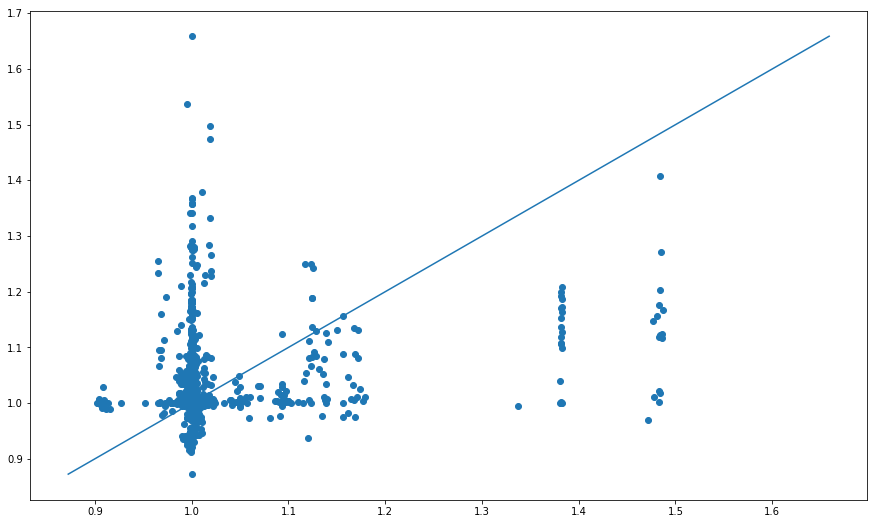

In [25]:
y_pred = clf.predict(x_test)
#for yt, yp in sorted(list(zip(y_test, y_pred)), key=lambda q: q[0]):
#    print(round(yt, 2), '\t', round(yp, 2))
    
plt.scatter(y_test, y_pred)
minv = min(min(y_test), min(y_pred))
maxv = max(max(y_test), max(y_pred))
plt.plot([minv, maxv], [minv, maxv])

In [53]:
if x.shape[1] != 2:
    pca = PCA(n_components=2)
    x2 = pca.fit_transform(x)
        
groups = list(df.index.get_level_values(0))
labels = [q[-6:] for q in groups]

trace1 = go.Scatter(x=x2[:,0], y=x2[:,1], mode='markers', text=labels, hoverinfo='text',
                        marker = dict(size=8, color=[np.log(q) for q in y], line=dict(width=1, color='rgb(0, 0, 0)')))

layout = go.Layout(showlegend=False, hovermode='closest',
               yaxis=dict(zeroline=False, title='dim2'),
               xaxis=dict(zeroline=False, title='dim1'))

fig = go.Figure(data = [trace1], layout = layout)
iplot(fig, filename="c-v-predict")

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
fl = FileLoader(['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o0'], mode='u', dim=[1, 2])
scores = []

for i in range(40):
    if (i+1)%10 == 0:
        print(i+1)
    fl.split()
    clf = KNeighborsRegressor(n_neighbors=6, weights='distance')
    clf.fit(fl.x_train, fl.y_train) 
    scores.append(clf.score(fl.x_test, fl.y_test))
    
print(round(np.mean(scores), 2), '+/-', round(np.std(scores), 2))

Loaded dataframe: (2157, 53)
Loaded dataframe: (2158, 1)
Train: (377, 56)
Test:  (171, 56)
Train: (385, 56)
Test:  (163, 56)
Train: (376, 56)
Test:  (172, 56)
Train: (378, 56)
Test:  (170, 56)
Train: (387, 56)
Test:  (161, 56)
Train: (380, 56)
Test:  (168, 56)
Train: (380, 56)
Test:  (168, 56)
Train: (385, 56)
Test:  (163, 56)
Train: (387, 56)
Test:  (161, 56)
10
Train: (379, 56)
Test:  (169, 56)
Train: (381, 56)
Test:  (167, 56)
Train: (385, 56)
Test:  (163, 56)
Train: (385, 56)
Test:  (163, 56)
Train: (385, 56)
Test:  (163, 56)
Train: (378, 56)
Test:  (170, 56)
Train: (392, 56)
Test:  (156, 56)
Train: (381, 56)
Test:  (167, 56)
Train: (380, 56)
Test:  (168, 56)
Train: (370, 56)
Test:  (178, 56)
20
Train: (373, 56)
Test:  (175, 56)
Train: (381, 56)
Test:  (167, 56)
Train: (390, 56)
Test:  (158, 56)
Train: (380, 56)
Test:  (168, 56)
Train: (386, 56)
Test:  (162, 56)
Train: (395, 56)
Test:  (153, 56)
Train: (373, 56)
Test:  (175, 56)
Train: (386, 56)
Test:  (162, 56)
Train: (387, 56)
Te

In [10]:
fl = FileLoader(['o3c'], mode='u', dim=[1, 2])
scores = []

for i in range(40):
    if (i+1)%10 == 0:
        print(i+1)
    fl.split()
    
    fs = FeatureSelector('pca')
    fs.fit(fl.x_train, fl.y_train, fl.df_train, pca_comp=11)
    x = fs.transform(fl.x_train)
    x_test = fs.transform(fl.x_test)
    y, y_test = fl.y_train, fl.y_test
    df, df_test = fl.df_train, fl.df_test
    
    clf = KNeighborsRegressor(n_neighbors=6, weights='distance')
    clf.fit(x, y) 
    scores.append(clf.score(x_test, y_test))
    
print(round(np.mean(scores), 2), '+/-', round(np.std(scores), 2))

Loaded dataframe: (13156, 53)
Loaded dataframe: (13157, 1)
Train: (6755, 56)
Test:  (2999, 56)
Train: (6836, 56)
Test:  (2918, 56)
Train: (6877, 56)
Test:  (2877, 56)
Train: (6833, 56)
Test:  (2921, 56)
Train: (6781, 56)
Test:  (2973, 56)
Train: (6819, 56)
Test:  (2935, 56)
Train: (6840, 56)
Test:  (2914, 56)
Train: (6874, 56)
Test:  (2880, 56)
Train: (6838, 56)
Test:  (2916, 56)
10
Train: (6809, 56)
Test:  (2945, 56)
Train: (6773, 56)
Test:  (2981, 56)
Train: (6797, 56)
Test:  (2957, 56)
Train: (6856, 56)
Test:  (2898, 56)
Train: (6852, 56)
Test:  (2902, 56)
Train: (6821, 56)
Test:  (2933, 56)
Train: (6874, 56)
Test:  (2880, 56)
Train: (6864, 56)
Test:  (2890, 56)
Train: (6830, 56)
Test:  (2924, 56)
Train: (6790, 56)
Test:  (2964, 56)
20
Train: (6844, 56)
Test:  (2910, 56)
Train: (6819, 56)
Test:  (2935, 56)
Train: (6803, 56)
Test:  (2951, 56)
Train: (6869, 56)
Test:  (2885, 56)
Train: (6818, 56)
Test:  (2936, 56)
Train: (6836, 56)
Test:  (2918, 56)
Train: (6853, 56)
Test:  (2901, 56)

In [ ]:
fl = FileLoader(['o1c'], mode='speedup', dim=[1, 2])
scores = []

for i in range(40):
    if (i+1)%10 == 0:
        print(i+1)
    fl.split()
    
    fs = FeatureSelector('nca')
    fs.fit(fl.x_train, fl.y_train, fl.df_train, nca_dim=16)
    x = fs.transform(fl.x_train)
    x_test = fs.transform(fl.x_test)
    y, y_test = fl.y_train, fl.y_test
    df, df_test = fl.df_train, fl.df_test
    
    clf = KNeighborsRegressor(n_neighbors=6, weights='distance')
    clf.fit(x, y) 
    scores.append(clf.score(x_test, y_test))
    
print(round(np.mean(scores), 2), '+/-', round(np.std(scores), 2))

Loaded dataframe: (10630, 53)
Loaded dataframe: (10629, 1)
   0 -3175.960816
   1 -3188.366689
   2 -3211.896278
   3 -3263.084757
   4 -3327.654113
   5 -3387.862917
   6 -3423.353179
   7 -3452.158065
   8 -3483.276954
   9 -3511.312155


In [16]:
res = {}
for c in df.columns:
    res[c] = 0

for i in range(40):
    fs = FeatureSelector('step')
    fs.fit(fl.x, fl.y, fl.df)
    x = fs.transform(fl.x)
    x_test = fs.transform(fl.x_test)
    feats = [fl.df.columns[q] for q in fs.feats]
    for f in feats:
        res[f] += 1
        
resl = [(k, v) for k, v in res.items()]
resl = sorted(resl, key=lambda q: q[1], reverse=True)
for k, v in resl:
    print(k, '\t', v)

Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.58
Selected 8 features:
	PAPI_BR_NTK
	PAPI_FDV_INS
	PAPI_L1_TCM
	PAPI_L2_DCM
	PAPI_L2_STM
	PAPI_LD_INS
	PAPI_RES_STL
	PAPI_TLB_DM
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.6
Selected 17 features:
	PAPI_BR_INS
	PAPI_DP_OPS
	PAPI_FDV_INS
	PAPI_FP_INS
	PAPI_FP_OPS
	PAPI_HW_INT
	PAPI_L1_STM
	PAPI_L2_DCM
	PAPI_L2_DCW
	PAPI_L2_LDM
	PAPI_L2_STM
	PAPI_L2_TCH
	PAPI_L2_TCM
	PAPI_LD_INS
	PAPI_RES_STL
	PAPI_TLB_DM
	PAPI_VEC_INS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.54
Selected 10 features:
	PAPI_FDV_INS
	PAPI_L2_STM
	PAPI_L2_TCH
	PAPI_L2_TCM
	PAPI_LD_INS
	PAPI_RES_STL
	PAPI_SP_OPS
	PAPI_TLB_DM
	PAPI_TOT_CYC
	PAPI_VEC_INS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.5
Selected 15 features:
	PAPI_FDV_INS
	PAPI_FML_INS
	PAPI_FP_INS
	P

Best score in training set: 0.6
Selected 7 features:
	PAPI_DP_OPS
	PAPI_FDV_INS
	PAPI_FP_INS
	PAPI_FP_OPS
	PAPI_L2_DCW
	PAPI_TLB_DM
	PAPI_TOT_IIS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.57
Selected 10 features:
	PAPI_BR_NTK
	PAPI_FDV_INS
	PAPI_FP_INS
	PAPI_L2_DCM
	PAPI_L2_STM
	PAPI_LD_INS
	PAPI_RES_STL
	PAPI_TLB_DM
	PAPI_TLB_IM
	PAPI_VEC_INS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.57
Selected 11 features:
	PAPI_FDV_INS
	PAPI_FP_INS
	PAPI_FP_OPS
	PAPI_L2_DCM
	PAPI_L2_STM
	PAPI_L2_TCH
	PAPI_L2_TCM
	PAPI_LD_INS
	PAPI_RES_STL
	PAPI_TLB_DM
	PAPI_TOT_IIS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.51
Selected 8 features:
	PAPI_BR_NTK
	PAPI_FDV_INS
	PAPI_L2_DCR
	PAPI_L2_DCW
	PAPI_L2_STM
	PAPI_L2_TCH
	PAPI_LD_INS
	PAPI_SP_OPS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.

Best score in training set: 0.51
Selected 12 features:
	PAPI_CA_SHR
	PAPI_FDV_INS
	PAPI_FML_INS
	PAPI_L1_DCH
	PAPI_L2_DCM
	PAPI_L2_TCA
	PAPI_L2_TCM
	PAPI_LD_INS
	PAPI_SP_OPS
	PAPI_SR_INS
	PAPI_TLB_DM
	PAPI_VEC_INS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.49
Selected 9 features:
	PAPI_BR_NTK
	PAPI_FDV_INS
	PAPI_L1_TCM
	PAPI_L2_STM
	PAPI_L2_TCH
	PAPI_LD_INS
	PAPI_TOT_CYC
	PAPI_VEC_INS
	PAPI_VEC_SP
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.55
Selected 9 features:
	PAPI_BR_NTK
	PAPI_FDV_INS
	PAPI_L1_TCA
	PAPI_L2_DCW
	PAPI_L2_TCM
	PAPI_L2_TCW
	PAPI_LD_INS
	PAPI_SP_OPS
	PAPI_TOT_IIS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.5
Selected 9 features:
	PAPI_FDV_INS
	PAPI_FP_OPS
	PAPI_L1_ICM
	PAPI_L1_STM
	PAPI_L2_DCA
	PAPI_L2_STM
	PAPI_LD_INS
	PAPI_SP_OPS
	PAPI_VEC_INS
Performing step feature selection (step=5, n_iter=1)
Iterati

Best score in training set: 0.51
Selected 8 features:
	PAPI_BR_NTK
	PAPI_FDV_INS
	PAPI_FP_INS
	PAPI_L2_DCR
	PAPI_L2_DCW
	PAPI_L2_STM
	PAPI_L2_TCH
	PAPI_LD_INS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.51
Selected 12 features:
	PAPI_BR_INS
	PAPI_CA_SHR
	PAPI_FDV_INS
	PAPI_FML_INS
	PAPI_L1_DCM
	PAPI_L1_ICA
	PAPI_L1_STM
	PAPI_L1_TCM
	PAPI_L2_DCM
	PAPI_LD_INS
	PAPI_REF_CYC
	PAPI_SP_OPS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.57
Selected 10 features:
	PAPI_BR_INS
	PAPI_FDV_INS
	PAPI_FML_INS
	PAPI_L1_ICM
	PAPI_L1_TCM
	PAPI_L2_DCA
	PAPI_L2_DCM
	PAPI_L2_LDM
	PAPI_LD_INS
	PAPI_SP_OPS
Performing step feature selection (step=5, n_iter=1)
Iteration 1 / 1
Best score in training set: 0.49
Selected 12 features:
	PAPI_BR_NTK
	PAPI_DP_OPS
	PAPI_FDV_INS
	PAPI_FP_INS
	PAPI_FP_OPS
	PAPI_L1_DCH
	PAPI_L2_TCH
	PAPI_LD_INS
	PAPI_SP_OPS
	PAPI_TLB_DM
	PAPI_TOT_IIS
	PAPI_VEC_INS
Performing step fea

In [294]:
if x.shape[1] != 3:
    pca = PCA(n_components=3)
    x2 = pca.fit_transform(x)
        
trace1 = go.Scatter3d(x=x2[:,0], y=x2[:,1], z=x2[:,2], mode='markers', hoverinfo='none',
                        marker = dict(size=2, color=[np.log(q) for q in y], line=dict(width=1, color='rgb(0, 0, 0)')))

layout = go.Layout(showlegend=False,
               yaxis=dict(zeroline=False, title='dim2', ticks='', showticklabels=False),
               xaxis=dict(zeroline=False, title='dim1', ticks='', showticklabels=False))

fig = go.Figure(data = [trace1], layout = layout)
iplot(fig, filename="c-v-predict")

In [9]:
model_path = '../lore/models/'
joblib.dump(scaler, model_path + 'scaler.pkl') 
joblib.dump(pca, model_path + 'pca.pkl')
joblib.dump(neigh, model_path + 'neigh.pkl') 

['../lore/models/neigh.pkl']

In [77]:
for q1, q2, q3 in zip(df['PAPI_L1_STM'], df['PAPI_L2_DCW'], df['PAPI_L2_TCW']):
    if q1 != q2 or q1 != q3:
        print(q1, q2, q3)
#fl.df.iloc[3]
#fl.df[['PAPI_L2_TCH', 'PAPI_L2_TCA']]

4.153637698261299 4.153637698261299


In [103]:
q=61
for c1 in fl.df.columns:
    for c2 in fl.df.columns:
        if c1 > c2 and fl.df[c1][q] != 0 and fl.df[c1][q] == fl.df[c2][q]:
            print(c1, fl.df[c1][q], c2, fl.df[c2][q])

PAPI_L2_DCR 0.0032231022340352663 PAPI_L1_LDM 0.0032231022340352663
PAPI_L2_DCW 1.0205804134654721e-08 PAPI_L1_STM 1.0205804134654721e-08
PAPI_L2_TCW 1.0205804134654721e-08 PAPI_L1_STM 1.0205804134654721e-08
PAPI_L2_TCW 1.0205804134654721e-08 PAPI_L2_DCW 1.0205804134654721e-08
max_dim 1 PAPI_TOT_INS 1


In [102]:
print(df['PAPI_L2_ICM'].sum(), df['PAPI_L1_STM'].sum())

8.186841109397044e-05 4.153637698261299


In [147]:
qc = 'PAPI_L2_TCM'
qdf = fl.df.sort_values([qc])
for q1, q2 in zip(qdf[qc], qdf['rev']):
    print(q1, '\t', q2)

9.188860370568181e-05 	 1.0
0.00010970561623610517 	 0.0
0.00011104930628894916 	 0.0
0.00011395775652766391 	 0.0
0.00011713059138747808 	 0.0
0.00011815357542729817 	 0.0
0.00012089611589349825 	 0.0
0.00012831167563255355 	 0.0
0.00013114407468213773 	 0.0
0.0001343759938453266 	 0.0
0.00013531347435779073 	 0.0
0.00013699278753177694 	 0.0
0.0001421375818708205 	 0.0
0.0001433050623951215 	 0.0
0.00014352015873814525 	 0.0
0.00015529604666778454 	 0.0
0.0001616479453885017 	 0.0
0.00017190348418104535 	 0.0
0.0001913761278201928 	 0.0
0.00020015353836551727 	 0.0
0.0002578373532662398 	 0.0
0.0002607924404380147 	 0.0
0.0002628148141328084 	 0.0
0.00026575163177196086 	 0.0
0.0002665393619476752 	 0.0
0.0002680937093091067 	 0.0
0.00026900762803030537 	 0.0
0.0002692191331577367 	 0.0
0.00027134707660312566 	 0.0
0.0002738439798305862 	 0.0
0.0002789398327805791 	 0.0
0.00028009760085419646 	 0.0
0.00028040000672851904 	 0.0
0.0002807041178619226 	 0.0
0.00029299825443598074 	 0.0


In [148]:
list('as')

['a', 's']